In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)


In [2]:
#READ ORIGINAL CSV'S & MAKE DATAFRAMES.

#File locations of records.
test_match_records_file = "Test_Match_Records.csv"
odi_match_records_file = "ODI_Match_Records.csv"
t20_match_records_file = "T20_Match_Records.csv"

#Read csv records.
test_df_original = pd.read_csv(test_match_records_file)
odi_df_original = pd.read_csv(odi_match_records_file)
t20_df_original = pd.read_csv(t20_match_records_file)

#Create copies which will be cleaned up and used later.
test_df = test_df_original
odi_df = odi_df_original
t20_df = t20_df_original

In [3]:
#RENAME HEADERS TO INCLUDE UNDERSCORE
test_df.rename(columns={'Team 1':'Team_1','Team 2': 'Team_2','Toss Winner': 'Toss_Winner', 'Toss Decision': 'Toss_Decision'}, inplace=True)
odi_df.rename(columns={'Team 1':'Team_1','Team 2': 'Team_2','Toss Winner': 'Toss_Winner', 'Toss Decision': 'Toss_Decision'}, inplace=True)
t20_df.rename(columns={'Team 1':'Team_1','Team 2': 'Team_2','Toss Winner': 'Toss_Winner', 'Toss Decision': 'Toss_Decision'}, inplace=True)

In [4]:
#FIX DATA TYPES OF EACH DATAFRAME.
def FixDataTypesInDataFrame(df):
    #Quicker to change all columns to string type.
    df = df.astype('string')
    #Then change the only column which should be an int.
    df.Year = df.Year.astype('int')
    return df

test_df = FixDataTypesInDataFrame(test_df)
odi_df = FixDataTypesInDataFrame(odi_df)
t20_df = FixDataTypesInDataFrame(t20_df)

In [5]:
#REMOVE ABANDONED GAMES - WINNER COLUMN WILL EQUAL 'NO RESULT'

def RemoveNoResultsFromDataframe(dataframe):
    return dataframe[dataframe.Winner != 'no result']

def GetCountOfAbandonedGames(dataframe):
    return len(dataframe[dataframe.Winner == 'no result'])

#Get amounts of abandoned games in each dataframe.
print("Number of abandoned games:")
print("Test matches: " + str(GetCountOfAbandonedGames(test_df)))
print("ODI matches: " + str(GetCountOfAbandonedGames(odi_df)))
print("T20 matches: " + str(GetCountOfAbandonedGames(t20_df)))
print("")

#Remove abandoned games.
test_df = RemoveNoResultsFromDataframe(test_df)
odi_df = RemoveNoResultsFromDataframe(odi_df)
t20_df = RemoveNoResultsFromDataframe(t20_df)
      
print("Removed abandoned games. Updated counts:")
print("Test matches: " + str(GetCountOfAbandonedGames(test_df)))
print("ODI matches: " + str(GetCountOfAbandonedGames(odi_df)))
print("T20 matches: " + str(GetCountOfAbandonedGames(t20_df)))

Number of abandoned games:
Test matches: 0
ODI matches: 153
T20 matches: 35

Removed abandoned games. Updated counts:
Test matches: 0
ODI matches: 0
T20 matches: 0


In [6]:
#REMOVE ANY NON-ABANDONED GAMES WITH NO TOSS INFO. 
#1327 

def RemoveResultsFromDataframeWithNoTossInfo(dataframe):
    return dataframe[(dataframe.Toss_Winner.isnull()) == False]

#Proving there was instances of no toss data even for a non-abandoned game.
print("T20 row count before removing: " + str(t20_df.shape[0]))

test_df = RemoveResultsFromDataframeWithNoTossInfo(test_df)
odi_df = RemoveResultsFromDataframeWithNoTossInfo(odi_df)
t20_df = RemoveResultsFromDataframeWithNoTossInfo(t20_df)

print("T20 row count after removing: " + str(t20_df.shape[0]))

T20 row count before removing: 1414
T20 row count after removing: 1412


In [7]:
#REPLACE ANY SHORTENED / ABBREVIATED COUNTRY NAMES WITH THEIR LONG VERSION.
#Toss winner is always not abbreviated / shortened.

#Hardcoded any instances of abbreviations - would be better to generate this by looking through the dataframes.
team_abbreviation_dictionary = {'U.A.E.':'United Arab Emirates',
                                'U.S.A.':'United States of America',
                                'P.N.G.':'Papua New Guinea',
                                'Czech Rep.': 'Czech Republic',
                                'Cayman Is':'Cayman Islands'}


#Method which fixes a row if it finds that the team name or winner name is abbreviated / shortened.
def FixTossWinnerTeamAbbreviation(row):
 
    team_1_abbreviation = team_abbreviation_dictionary.get(row['Team_1'])    
    if(team_1_abbreviation != None):
        row['Team_1'] = team_1_abbreviation
        
    team_2_abbreviation = team_abbreviation_dictionary.get(row['Team_2'])
    if(team_2_abbreviation != None):
        row['Team_2'] = team_2_abbreviation
    
    winner_abbreviation = team_abbreviation_dictionary.get(row['Winner'])
    if(winner_abbreviation != None):
        row['Winner'] = winner_abbreviation
              
    return row

#Not used.
def GetAbbreviationOfText(text):
    split_text = text.split(' ')
    abbreviation = ''
    
    for word in split_text:
        if(word[0].isupper()):
            abbreviation += word[0] + '.'
            
    return abbreviation 



#Check / Fix all rows - definitely a better way. 
test_df = test_df.apply(lambda row: FixTossWinnerTeamAbbreviation(row), axis=1)
odi_df = odi_df.apply(lambda row: FixTossWinnerTeamAbbreviation(row), axis=1)
t20_df = t20_df.apply(lambda row: FixTossWinnerTeamAbbreviation(row), axis=1)          

#Checking if there are any abbreviated / shortened teams after they should be fixed.
test1 = len(test_df.query('Team_1 != Toss_Winner & Team_2 != Toss_Winner')) #0.
test2 = len(odi_df.query('Team_1 != Toss_Winner & Team_2 != Toss_Winner'))  #0. 
test3 = len(t20_df.query('Team_1 != Toss_Winner & Team_2 != Toss_Winner'))  #0.

In [8]:
#ENSURING EACH DATASET HAS UNIQUE ROWS / ENTRIES
print("Test Match duplicate entries: " + str(len(test_df[test_df.duplicated()])))
print("ODI duplicate entries: " + str(len(odi_df[odi_df.duplicated()])))
print("T20 duplicate entries: " + str(len(t20_df[t20_df.duplicated()])))
print("")

#T20 had one duplicate entry but ESPN cricinfo lists this as two seperate games 
#Each happening on the same day with a completely different scorecard but the exact same result: 
#Finland winning by 4 wickets with 7 balls remaining
#No idea what's going on with this but one is treated as a duplicate and discarded anyways.
#https://www.espncricinfo.com/series/sweden-in-finland-2021-1272986/finland-vs-sweden-1st-t20i-1273146/full-scorecard
#https://www.espncricinfo.com/series/sweden-in-finland-2021-1272986/finland-vs-sweden-2nd-t20i-1273147/ball-by-ball-commentary

#Print these to show list of duplicated entries.
test_df[test_df.duplicated()] 
odi_df[odi_df.duplicated()]
t20_df[t20_df.duplicated()]

test_df = test_df.drop_duplicates()
odi_df = odi_df.drop_duplicates()
t20_df = t20_df.drop_duplicates()
print("Dropped duplicate entries")
print("")

print("Test Match duplicate entries: " + str(len(test_df[test_df.duplicated()])))
print("ODI duplicate entries: " + str(len(odi_df[odi_df.duplicated()])))
print("T20 duplicate entries: " + str(len(t20_df[t20_df.duplicated()])))
print("")

Test Match duplicate entries: 39
ODI duplicate entries: 0
T20 duplicate entries: 1

Dropped duplicate entries

Test Match duplicate entries: 0
ODI duplicate entries: 0
T20 duplicate entries: 0



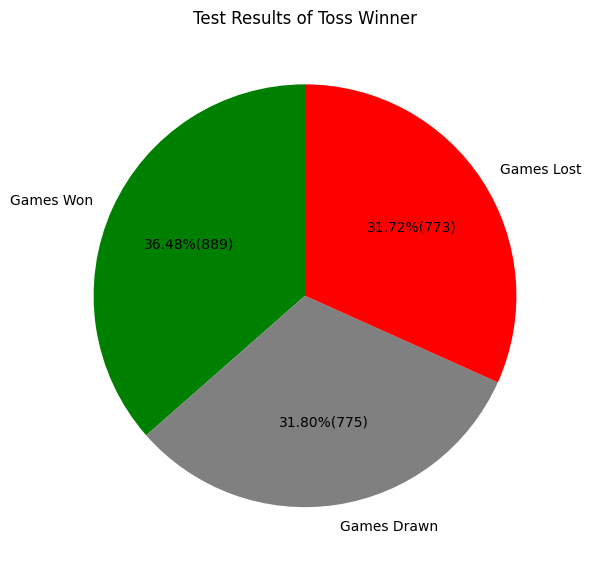

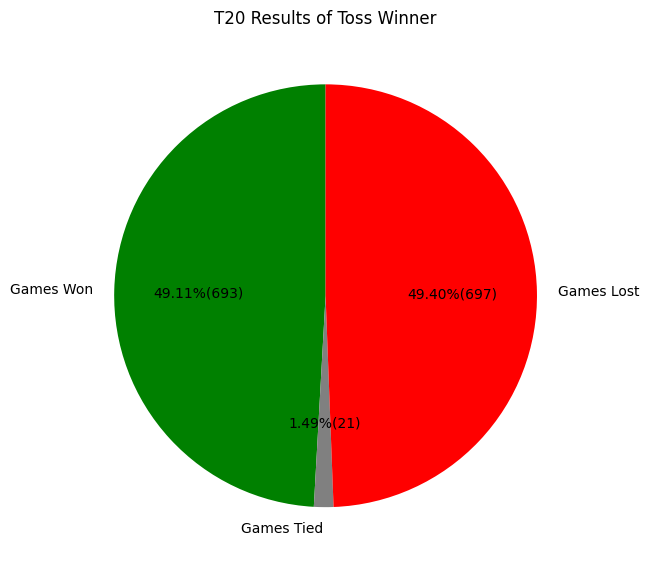

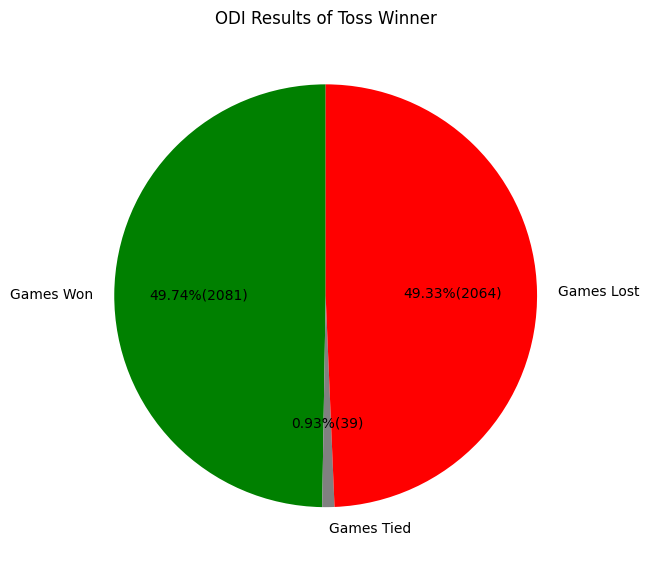

In [9]:
#TOSS WIN PERCENTAGE.
def NumEntries(df):
    return df.shape[0]

#Get num games won by team that won toss.
def GetNumberGamesWonByTossWinner(df):
    df_games_won_toss_winner = df[df['Toss_Winner'] == df['Winner']]
    #index = df_games_won_toss_winner.index
    #number_of_rows = len(index)
    #return number_of_rows
    return df_games_won_toss_winner.shape[0]

def GetNumberGamesLostByTossWinner(df):
    df_games_lost_toss_winner = df[(df['Toss_Winner'] != df['Winner']) & (df['Winner'] != 'drawn') & (df['Winner'] != 'tied') ]
    #index = df_games_won_toss_winner.index
    #number_of_rows = len(index)
    #return number_of_rows 
    return df_games_lost_toss_winner.shape[0]
    
    
#Can only draw a game for a test match.
def GetNumberGamesDrawn():
    test_df_games_drawn = test_df[test_df['Winner'] == 'drawn' ]
    return test_df_games_drawn.shape[0]

def GetNumberGamesTied(df):
    df_games_tied = df[df['Winner'] == 'tied']
    index = df_games_tied.index
    number_of_rows = len(index)
    return number_of_rows 

def DisplayPieChartTossWinnerResultsTestMatch():
    num_test_games = NumEntries(test_df) #2439
    num_test_games_won_by_toss_winner = GetNumberGamesWonByTossWinner(test_df) #889
    num_test_games_drawn = GetNumberGamesDrawn() #775
    num_test_games_lost_by_toss_winner = GetNumberGamesLostByTossWinner(test_df) #775
    
    
    colours = ['green','grey','red']
    test_labels = ['Games Won','Games Drawn','Games Lost']
    test_data = [num_test_games_won_by_toss_winner,num_test_games_drawn,num_test_games_lost_by_toss_winner]

    fig = plt.figure(figsize =(7, 7), dpi = 100)
    plt.pie(test_data, labels = test_labels, colors=colours,autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*sum(test_data)),startangle=90)
    plt.title("Test Results of Toss Winner")
    #plt.setp(size = 8, weight ="bold")
    # show plot
    plt.show()  

def DisplayPieChartTossWinnerResultsOneDayGame(df,onedaytype):
    num_games = NumEntries(df)
    num_games_won_by_toss_winner = GetNumberGamesWonByTossWinner(df)
    num_games_tied = GetNumberGamesTied(df)
    num_games_lost_by_toss_winner = GetNumberGamesLostByTossWinner(df)
    
    colours = ['green','grey','red']
    labels = ['Games Won','Games Tied','Games Lost']
    data = [num_games_won_by_toss_winner,num_games_tied,num_games_lost_by_toss_winner]

    fig = plt.figure(figsize =(7, 7), dpi = 100)
    plt.pie(data, labels = labels, colors=colours,autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*sum(data)),startangle=90)
    plt.title(onedaytype + " Results of Toss Winner")
    #plt.setp(size = 8, weight ="bold")
    # show plot
    plt.show()  
    
    
    
#num_test_games = NumEntries(test_df) #2439
#num_test_games_won_by_toss_winner = GetNumberGamesWonByTossWinner(test_df) #889
#num_test_games_drawn = GetNumberGamesDrawn() #775
#num_test_games_lost_by_toss_winner = GetNumberGamesLostByTossWinner(test_df) #775

DisplayPieChartTossWinnerResultsTestMatch()
DisplayPieChartTossWinnerResultsOneDayGame(t20_df,"T20")
DisplayPieChartTossWinnerResultsOneDayGame(odi_df,"ODI")

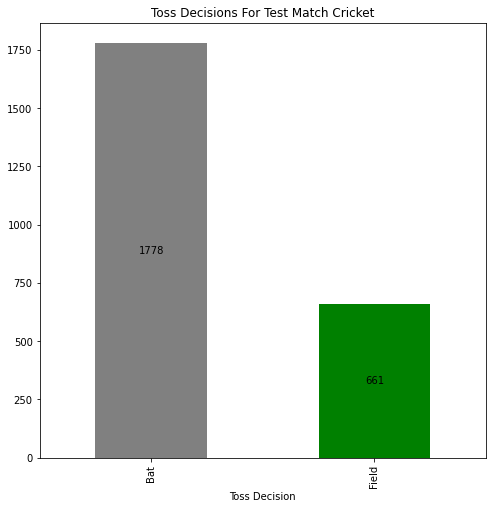

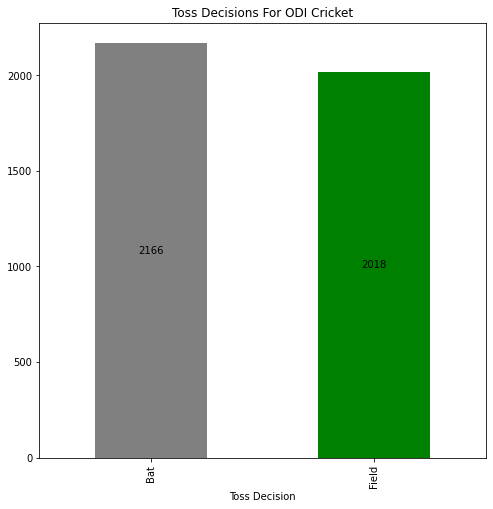

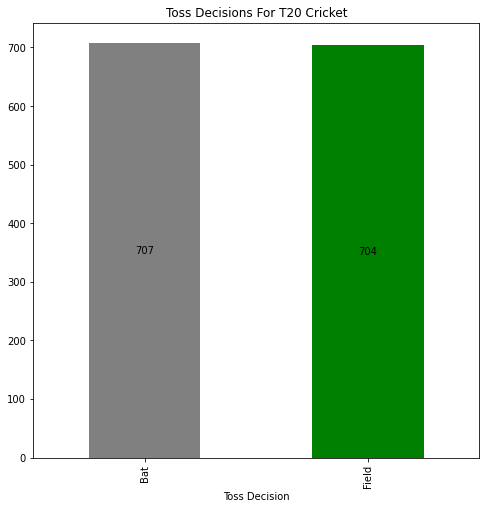

In [10]:
#AMOUNT OF TEAMS THAT CHOSE TO BAR OR FIELD FIRST.
def CreateTossDecisionBar(df,title):
    plot = df.Toss_Decision.value_counts().plot(kind='bar', figsize=(8, 8),color=['grey','green'])
    
    for c in plot.containers:
        #Optional: if the segment is small or 0, customize the labels
        labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
        #remove the labels parameter if it's not needed for customized labels
        plot.bar_label(c, labels=labels, label_type='center')

    plt.title(title)
    plt.xlabel("Toss Decision")
    plt.show()
    
CreateTossDecisionBar(test_df,"Toss Decisions For Test Match Cricket")
CreateTossDecisionBar(odi_df,"Toss Decisions For ODI Cricket") 
CreateTossDecisionBar(t20_df,"Toss Decisions For T20 Cricket") 


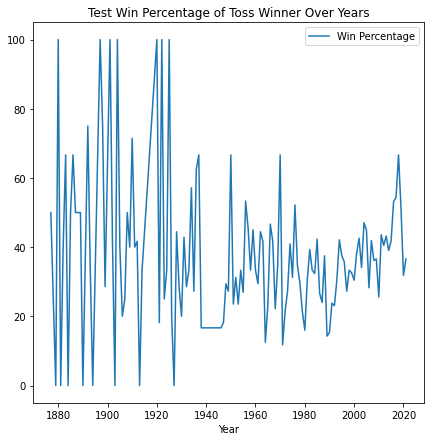

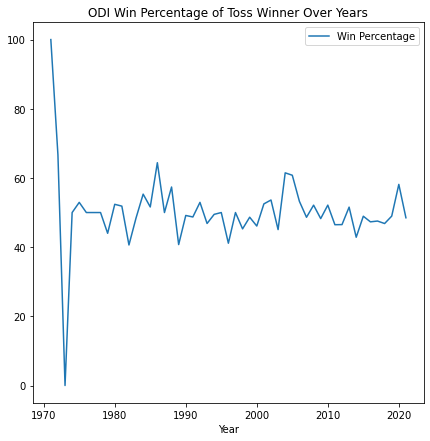

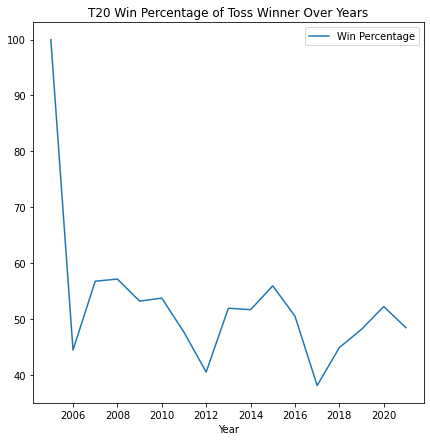

In [11]:
#WIN % OVER YEARS.

def GetListUniqueYears(df):  
    year_df = df.Year
    return year_df.drop_duplicates() 


#Return list of percentage wins in a dataframe for each year.
def GetListOfPercentageWinsForEachYear(year_array,df):
    
    win_percentage_list = []
    
    for year in year_array:
        df_for_year = df[df['Year'] == year]
        results_in_year = df_for_year.shape[0]
        df_toss_winner_wins = df_for_year[df_for_year['Toss_Winner'] == df_for_year['Winner']]
        num_toss_winner_wins = df_toss_winner_wins.shape[0]
        #print(results_in_year)
        #print(num_toss_winner_wins)
        win_percentage_list.append((num_toss_winner_wins / results_in_year) * 100)
        #print(df_for_year)
    
    return win_percentage_list


def CreateLinePlotWinPercentageOverYears(df,title):
    
    #Get each - year into array.
    #year_df = df.Year
    #years = year_df.drop_duplicates()
    years = GetListUniqueYears(df)
    
    win_percentage_list = GetListOfPercentageWinsForEachYear(years,df)
    
    year_win_percentage_df = pd.DataFrame({
                            'Win Percentage': win_percentage_list
                             }, index= years)
    lines = year_win_percentage_df.plot.line(figsize=(7,7),title=title)


CreateLinePlotWinPercentageOverYears(test_df,"Test Win Percentage of Toss Winner Over Years")
CreateLinePlotWinPercentageOverYears(odi_df,"ODI Win Percentage of Toss Winner Over Years")
CreateLinePlotWinPercentageOverYears(t20_df,"T20 Win Percentage of Toss Winner Over Years")

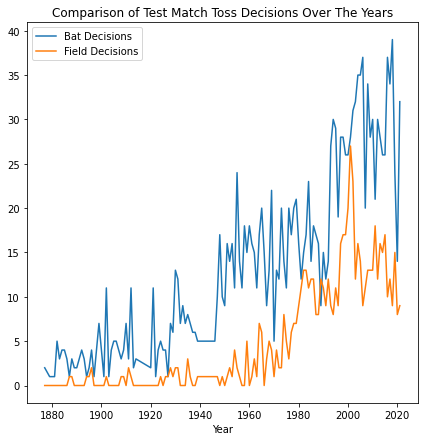

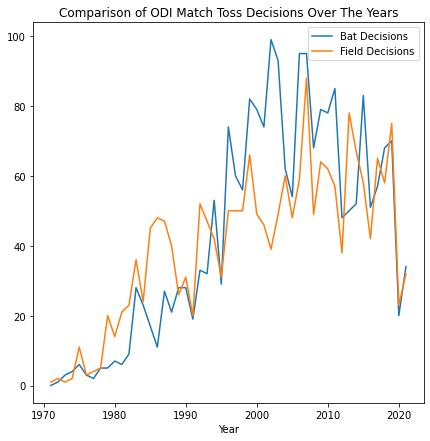

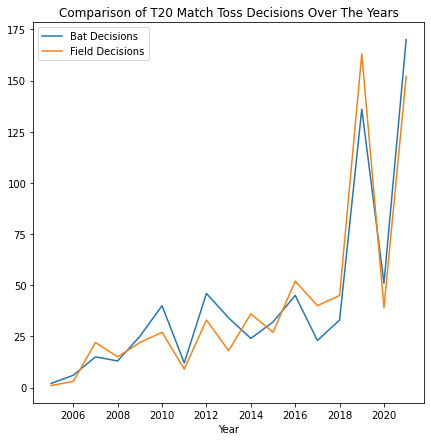

In [12]:
def CreateLinePlotTossDecisionAmountComparison(df,title):
    #year_df = odi_df.Year
    #years = year_df.drop_duplicates()
    years = GetListUniqueYears(df)
    num_bat_decisions_list = []
    num_field_decisions_list = []
    for year in years:
        df_for_year = df[df['Year'] == year]
        #results_in_year = df_for_year.shape[0]
        num_bat_decisions = df_for_year[df_for_year['Toss_Decision'] == 'Bat'].shape[0]
        num_field_decisions = df_for_year[df_for_year['Toss_Decision'] == 'Field'].shape[0]
        #print(num_bat_decisions)
        #print(num_field_decisions)
        num_bat_decisions_list.append(num_bat_decisions)
        num_field_decisions_list.append(num_field_decisions)
        
    toss_decision_comparison_df = pd.DataFrame({
                            'Bat Decisions': num_bat_decisions_list,
                             'Field Decisions' : num_field_decisions_list
                             }, index= years)
    lines = toss_decision_comparison_df.plot.line(figsize=(7,7),title=title)


CreateLinePlotTossDecisionAmountComparison(test_df,"Comparison of Test Match Toss Decisions Over The Years")
CreateLinePlotTossDecisionAmountComparison(odi_df,"Comparison of ODI Match Toss Decisions Over The Years")
CreateLinePlotTossDecisionAmountComparison(t20_df,"Comparison of T20 Match Toss Decisions Over The Years")

In [13]:
years = GetListUniqueYears(t20_df)

num_bat_decisions_list = []
num_field_decisions_list = []
for year in years:
    df_for_year = t20_df[t20_df['Year'] == year]
    #results_in_year = df_for_year.shape[0]
    num_bat_decisions = df_for_year[df_for_year['Toss_Decision'] == 'Bat'].shape[0]
    num_field_decisions = df_for_year[df_for_year['Toss_Decision'] == 'Field'].shape[0]
    #print(num_bat_decisions)
    #print(num_field_decisions)
    num_bat_decisions_list.append(num_bat_decisions)
    num_field_decisions_list.append(num_field_decisions)
    
    
df = pd.DataFrame({'bat_decisions':num_bat_decisions_list,
                   'field_decisions': num_field_decisions_list}, index=years)


In [14]:
#Testing.
#One day games.
#More advantageous to win the toss in ODI's compared to T20's? 

#P Value less than 0.05? Reject null hypothesis
#P Value greater than 0.05? Fail to reject null hypothesis

#Null hypothesis - there is no difference between the sample means - are the same. 

#Two arrays - 
#each year win percentage winning toss
#each year win percentage losing toss

t20_years = GetListUniqueYears(t20_df)
odi_years = GetListUniqueYears(odi_df)

t20_percentageWins = GetListOfPercentageWinsForEachYear(t20_years,t20_df)
odi_percentageWins = GetListOfPercentageWinsForEachYear(odi_years,odi_df)


t, p_twosided = stats.ttest_ind(t20_percentageWins, odi_percentageWins,equal_var=True)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)


#Since P Value is greater than 0.05, we fail to reject the null hypothesis - we don't have enough evidence to say that the 
#average win percentage between ODI and T20 cricket is significantly different. 

t =  0.7063178458750117 , p_twosided =  0.4824765263564066 , p_onesided = 0.2412382631782033


In [15]:
#More advantageous to win the toss in One day cricket (ODI & T20) compared to Test matches? 
one_day_percentage_wins_list = t20_percentageWins + odi_percentageWins
test_percentage_wins_list = GetListOfPercentageWinsForEachYear(GetListUniqueYears(test_df),test_df)


t, p_twosided = stats.ttest_ind(one_day_percentage_wins_list, test_percentage_wins_list,equal_var=False)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

#Since P Value is less than 0.05 we can reject the null hypothesis that there is not a significant difference between mean win
#percentages in one day cricket and test match cricket. 

#There IS a big difference between the mean win percentage values between both forms of cricket. 

t =  5.2524657983715795 , p_twosided =  3.8816450599182993e-07 , p_onesided = 1.9408225299591497e-07


In [16]:
#Toss win / not win percentage across formats

def GetTossWinnerWinNonWinPercentageList(df):
    years = GetListUniqueYears(df)
    win_percentage_list = []
    non_win_percentage_list = []
    for year in years:

        df_for_year = df[df['Year'] == year]
        results_in_year = df_for_year.shape[0]

        df_toss_winner_wins = df_for_year[df_for_year['Toss_Winner'] == df_for_year['Winner']]
        num_toss_winner_wins_in_year = df_toss_winner_wins.shape[0]

        num_toss_winner_losses = results_in_year - num_toss_winner_wins_in_year   
        toss_winner_win_percentage_for_year = (num_toss_winner_wins_in_year / results_in_year) * 100
        toss_winner_non_win_percentage_for_year = 100 - toss_winner_win_percentage_for_year
        win_percentage_list.append(toss_winner_win_percentage_for_year)
        non_win_percentage_list.append(toss_winner_non_win_percentage_for_year)
    
    return win_percentage_list,non_win_percentage_list

def PrintTTestResultsForWinPercentageOfTossWinner(df):
    win_percentage_list,non_win_percentage_list = GetTossWinnerWinNonWinPercentageList(df)
    t, p_twosided = stats.ttest_ind(win_percentage_list, non_win_percentage_list)
    print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)
            
print("T-Test results of win percentage of toss winner for test match cricket")
PrintTTestResultsForWinPercentageOfTossWinner(test_df)
print("")
print("T-Test results of win percentage of toss winner for ODI cricket")
PrintTTestResultsForWinPercentageOfTossWinner(odi_df)
print("")
print("T-Test results of win percentage of toss winner for T20 cricket")
PrintTTestResultsForWinPercentageOfTossWinner(t20_df)

#Output:
#T-Test results of win percentage of toss winner for test match cricket
#t =  -8.615687357708802 , p_twosided =  6.851116692427225e-16 , p_onesided = 3.4255583462136126e-16

#T-Test results of win percentage of toss winner for ODI cricket
#t =  0.2815566451614757 , p_twosided =  0.7788652964570402 , p_onesided = 0.3894326482285201

#T-Test results of win percentage of toss winner for T20 cricket
#t =  1.1627583763268659 , p_twosided =  0.2535257404461223 , p_onesided = 0.12676287022306115

T-Test results of win percentage of toss winner for test match cricket
t =  -8.615687357708802 , p_twosided =  6.851116692427225e-16 , p_onesided = 3.4255583462136126e-16

T-Test results of win percentage of toss winner for ODI cricket
t =  0.2815566451614757 , p_twosided =  0.7788652964570402 , p_onesided = 0.3894326482285201

T-Test results of win percentage of toss winner for T20 cricket
t =  1.1627583763268659 , p_twosided =  0.2535257404461223 , p_onesided = 0.12676287022306115
